# Stationary Time Series (정상 시계열)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## What is Stationarity (정상성)?

1. constant mean (일정한 평균)  
2. constant variance (일정한 분산)  
3. constant autocorrelation structure (일정한 자기상관)  
4. no periodic component (주기 성분 없음)

다음 코드는 백색 잡음(white noise)을 생성하는 예제입니다.  
백색 잡음은 평균과 분산이 일정한, 서로 독립적인 난수의 시계열로, 주로 시계열 분석에서 랜덤한 변동성(noise)을 모델링하는 데 사용됩니다. 이후에 이를 활용하여 시계열 모델링 및 분석을 수행할 수 있습니다.

이 함수는 시계열 데이터를 시각화하는 데 사용됩니다. x축에는 시간(time) 정보를, y축에는 시계열 데이터의 값(value)을 나타냅니다.

 plot_sequence() 함수를 사용하여 백색 잡음 시계열 데이터를 시각화해 봅니다.

In [53]:
np.random.seed(0)

time = np.arange(500)

stationary = np.random.normal(loc=0,scale =1,size=len(time))
stationary

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

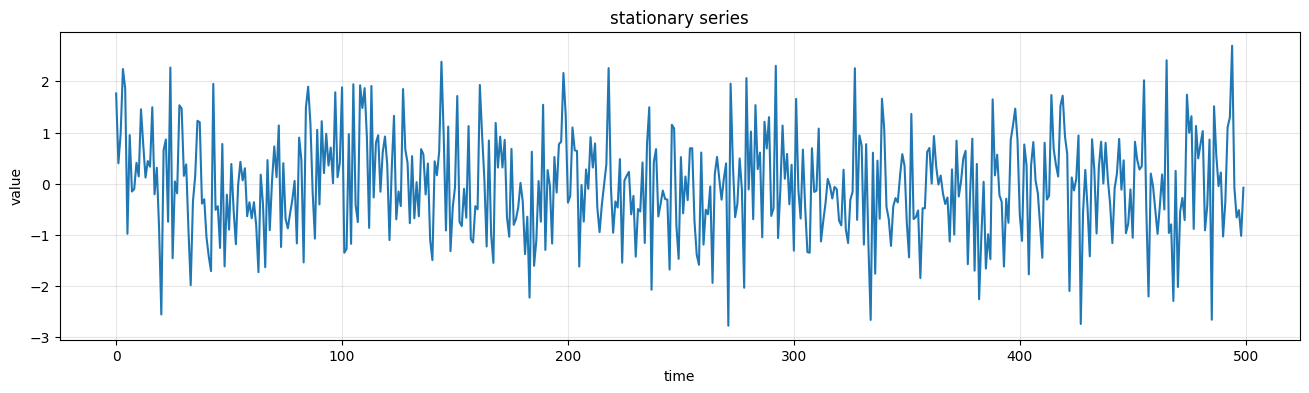

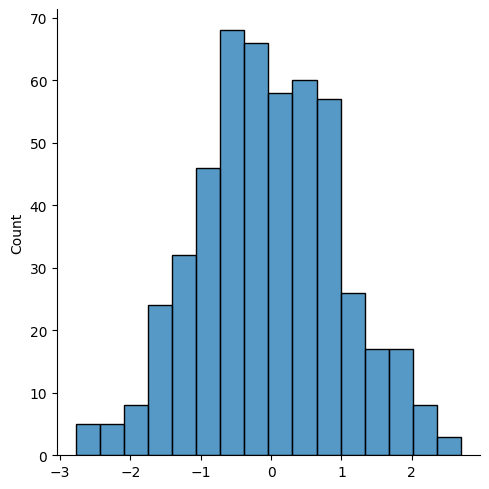

In [ ]:
def plot_sequence(x,y,title):
    plt.figure(figsize=(16,4))

    plt.plot(x,y)
    plt.xlabel("time")
    plt.ylabel("value")
    plt.title(title)
    plt.grid(alpha=0.3)
    return plt.show()

plot_sequence(time,stationary,"stationary series")


    

- 위의 플롯에는 뚜렷한 추세나 계절성이 없습니다. 이 시계열 데이터는 4가지 정상성 조건인 일정한 평균, 일정한 분산, 일정한 자기상관, 주기 성분 없음을 충족합니다.  

- 시계열의 histogram 을 plotting 하여 정규분포를 보이면 평균과 분산이 일정하다는 확신을 얻을 수 있습니다.

<Axes: >

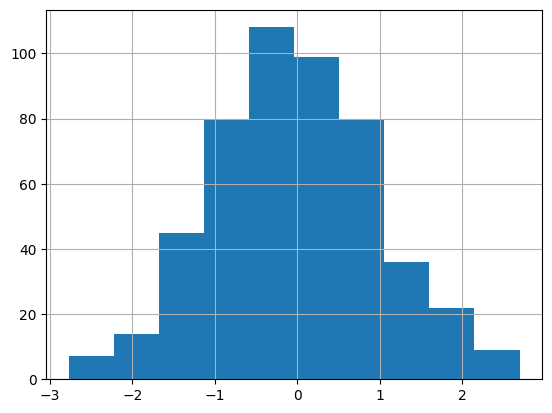

In [17]:
pd.Series(stationary).hist()

## Autocorrelation Structure  (자기 상관 구조)

- 특정 시점(step)이 다른 시점(step)과 수치적 연관성 있음.

- 자기상관성은 difference(차분)에 의해 stationary 로 바꿀 수 있다.

In [31]:
seed = 3.14

lagged = np.empty_like(time,dtype="float32")
for t in time:
    lagged[t] = seed + np.random.normal(loc=0,scale=2.5,size=1)
    seed = lagged[t]

lagged

C:\Users\chade\AppData\Local\Temp\ipykernel_5316\4030992187.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lagged[t] = seed + np.random.normal(loc=0,scale=2.5,size=1)


array([   6.57741  ,    3.246881 ,   -1.6746807,   -3.3248215,
         -2.8852742,   -1.6385485,    0.9813819,    1.6920811,
          6.0487533,    5.492239 ,    3.2095408,   -0.9935047,
         -3.215933 ,   -2.6106381,   -4.832439 ,   -2.4905827,
          1.0402366,   -4.883731 ,   -2.7236001,   -8.32261  ,
         -7.3188624,   -4.256686 ,   -4.094546 ,   -7.293769 ,
         -8.757347 ,   -9.411461 ,   -9.867073 ,  -10.374315 ,
        -10.649022 ,  -10.115322 ,  -13.136756 ,  -13.741805 ,
         -9.946152 ,  -10.907765 ,  -12.017356 ,   -9.321862 ,
        -15.719824 ,  -12.766377 ,  -14.346137 ,  -13.936316 ,
        -13.695512 ,  -11.339341 ,  -12.008328 ,  -13.703393 ,
        -10.458778 ,  -16.369213 ,  -16.318378 ,  -19.688192 ,
        -21.592125 ,  -16.563984 ,  -16.675472 ,  -16.187798 ,
        -20.641705 ,  -22.464315 ,  -21.972921 ,  -21.086027 ,
        -19.54381  ,  -19.52224  ,  -18.20473  ,  -17.070274 ,
        -21.644625 ,  -21.55211  ,  -19.632355 ,  -18.1

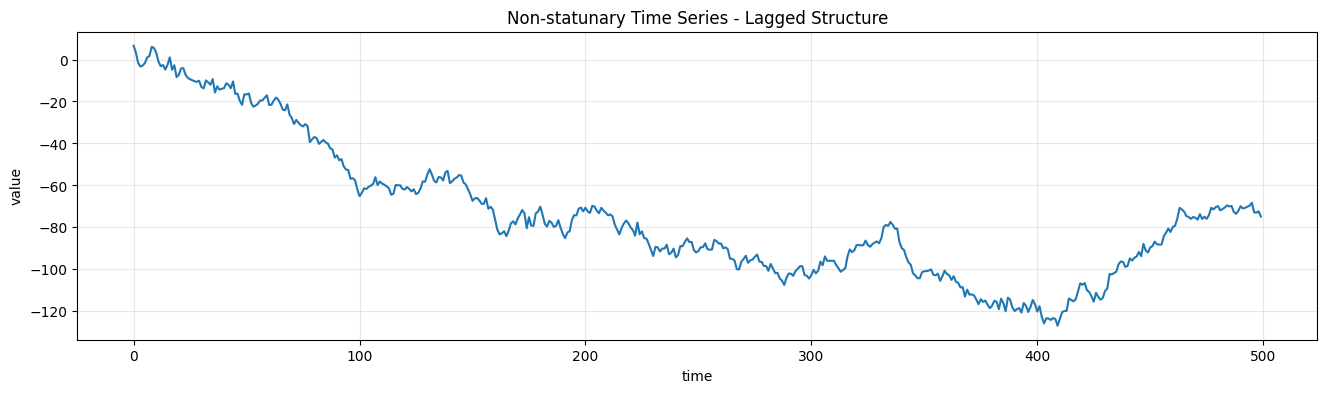

<Axes: >

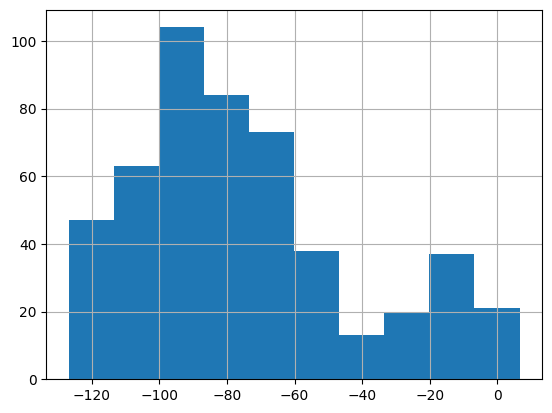

In [34]:
plot_sequence(time,lagged,"Non-statunary Time Series - Lagged Structure")

pd.Series(lagged).hist()

다음 코드는 자기상관 시계열 데이터를 생성하는 예제입니다.  
이 코드는 먼저 시계열 데이터의 초기값으로 seed 값을 지정합니다. 그리고 for 반복문을 사용하여 각 시점의 값을 랜덤하게 생성하면서, 이전 시점의 값과 일정한 자기 상관성을 부여합니다.  
구체적으로, np.random.normal() 함수를 사용하여 평균이 0, 표준편차가 2.5인 가우시안 분포를 따르는 난수를 생성합니다. 그리고 이를 초기값과 더하여 시계열 데이터의 값을 결정합니다. 이때, 이전 시점의 값을 seed 변수에 저장하여 다음 시점에서 사용합니다. 이 과정을 반복하여 시계열 데이터를 생성합니다.

위에서 생성한 자기상관 시계열 데이터를 시각화 해 봅니다.

시계열이 균일분포 등 비정규분포를 보이면 non-stationay 라고 판단 가능합니다.

## non-stationary (비정상) data의 특징

1. Trend (평균의 변화)가 존재
2. 이분산성(변동 분산)  
3. Seasonality (계절성, 주기적 구성요소)  
4. Trend + Seasonality

### Trend(추세)

평균이 시간이 지남에 따라 변하므로 non-stationary 시계열입니다.

다음 코드는 백색 잡음(stationary) 데이터와 시간(time) 정보를 이용하여 추세(trend) 시계열 데이터를 생성합니다. 이때 백색 잡음 데이터를 50배하여 값의 크기를 증가시키는 것으로 추세를 모델링합니다. 그리고 plot_sequence() 함수를 호출하여 추세 시계열 데이터를 시각화합니다. 

### 이분산성(변동 분산)

시간에 따른 분산의 변화

다음은 두 개의 수준을 갖는 시계열 데이터를 생성하는 예제입니다.  
random.normal() 함수를 사용하여 평균(loc)이 각각 0과 10이고, 표준편차(scale)가 각각 1.0과 10.0인 가우시안 분포를 따르는 두 가지의 데이터를 생성합니다. 이렇게 생성된 두 개 데이터를 결합하여 하나의 시계열 데이터를 생성합니다. 이때, 각 데이터는 각각 250개씩 생성되었습니다.

### Seasonality (계절성)

계정성은 주기적인 요소가 있으므로 non-stationary 입니다.

이 코드는 sin() 함수를 사용하여 시간(time) 정보에 대한 사인파(sin wave)를 생성하고, 이를 10배하여 시계열 데이터의 값의 크기를 증가시키는 것으로 계절성(seasonality)을 모델링합니다. 

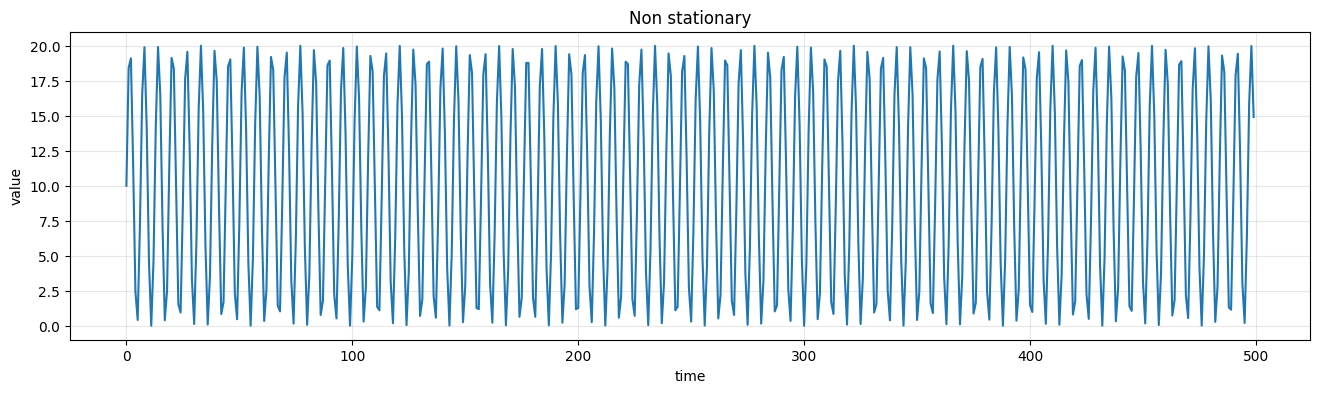

In [43]:
seasonality = 10 + np.sin(time)*10

plot_sequence(time,seasonality,title="Non stationary")


### Trend + Seasonality (추세 + 계절성)

평균이 시간이 지남에 따라 변하고 주기적인 구성 요소가 있습니다.

이 코드는 추세(trend), 계절성(seasonality), 백색 잡음(stationary)을 각각 더하여 추세와 계절성이 모두 존재하는 시계열 데이터를 생성합니다. 

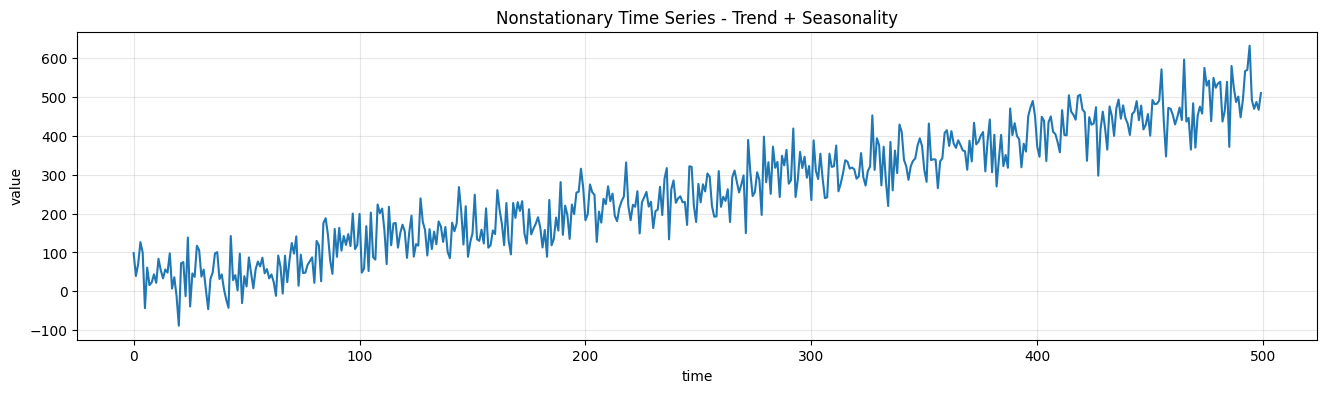

In [46]:
trend = time + stationary * 50



trend_seasonality = trend+seasonality

plot_sequence(time, trend_seasonality, title="Nonstationary Time Series - Trend + Seasonality")

### autocorrelation + trend (자기상관성 + 추세)

이 코드는 자기상관성(lagged)과 추세(trend)를 더하여 자기상관성이 있는 시계열 데이터를 생성합니다. 이때, 자기상관성 데이터를 10배하여 시계열 데이터의 값의 크기를 증가시키는 것으로 자기상관성을 모델링합니다.

다음은 금융위기와 같이 추세가 바뀌는 시계열 데이터를 시각화하는 예제입니다.  

이 코드는 추세(trend)와 백색 잡음(stationary) 데이터를 사용하여 추세 시계열 데이터를 생성합니다. 그리고 이를 50배하여 시계열 데이터의 값의 크기를 증가시키는 것으로 추세를 모델링합니다. 그리고 np.arange() 함수를 사용하여 길이가 2배인 시간(time) 배열을 생성합니다. 그리고 trend2 변수를 생성하여 이전에 생성한 추세 시계열 데이터를 반전시키고, 이를 50배하여 시계열 데이터의 값의 크기를 증가시키는 것으로 추세를 모델링합니다. 그리고 두 추세 시계열 데이터를 결합하여 추세가 바뀌는 시계열 데이터를 생성합니다. 

C:\Users\chade\AppData\Local\Temp\ipykernel_5316\2131218820.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)


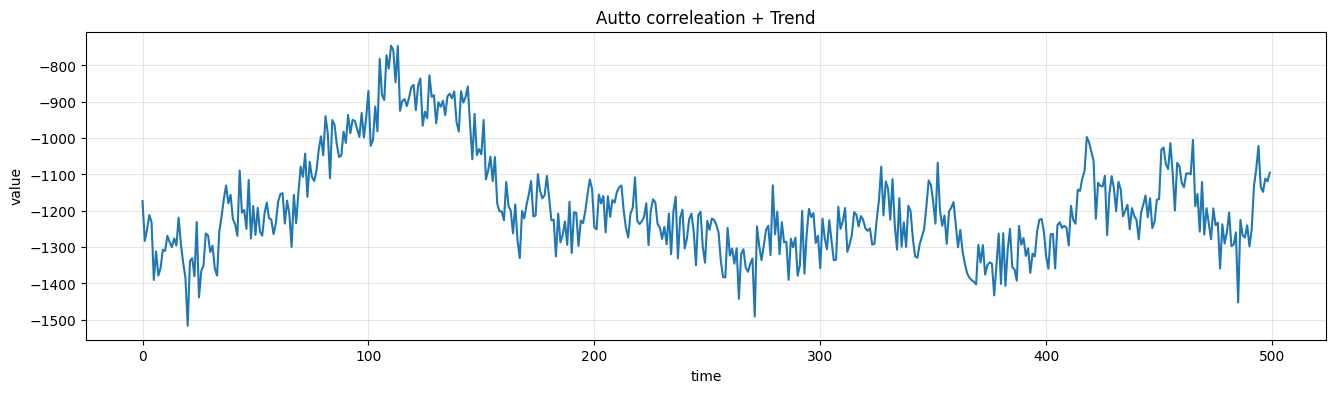

In [50]:
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t] #자기 상관성 부여

auto_correlation_trend = lagged*10+  trend

plot_sequence(time,auto_correlation_trend,title="Autto correleation + Trend")

In [60]:
trend2 = time + stationary *50


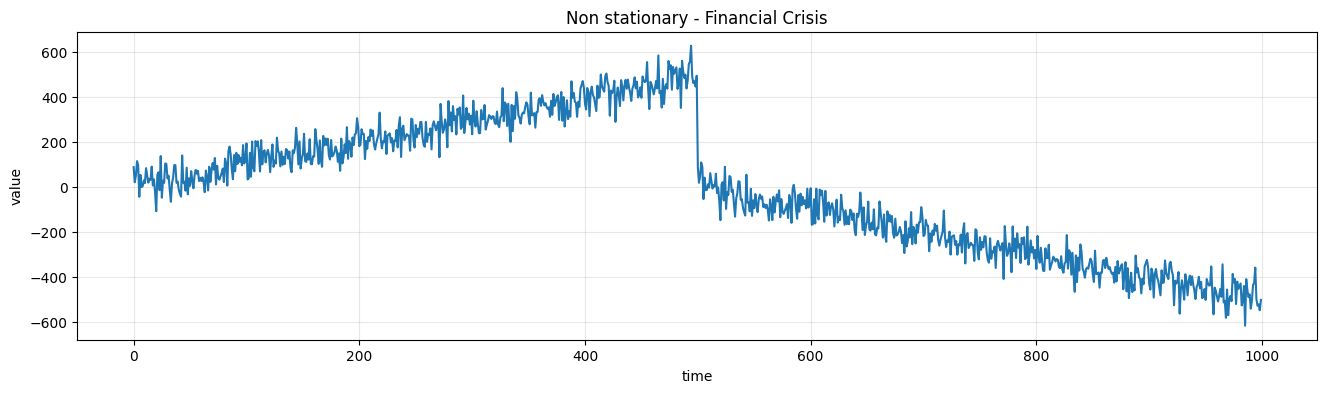

In [63]:
time2 = np.arange(time.size*2)

trend2 = -time + stationary *50

financial_crisis = np.append(trend,trend2)

auto_correlation_trend = lagged*10+  trend

plot_sequence(time2,financial_crisis,title="Non stationary - Financial Crisis")

## Differencing 으로 Autocorrelation 제거

차분(Differencing)을 수행한 후의 시계열 데이터를 시각화하는 예제입니다.  
lagged 변수에서 한 스텝 이전 데이터와 현재 데이터를 빼서 차분을 수행합니다. 그리고 plot_sequence() 함수를 호출하여 차분을 수행한 후의 시계열 데이터를 시각화합니다. 차분을 수행한 후의 시계열 데이터는 평균과 분산이 일정하게 유지되는 정상 상태의 특성을 가진 stationary한 데이터로 변환되었음을 확인할 수 있습니다.

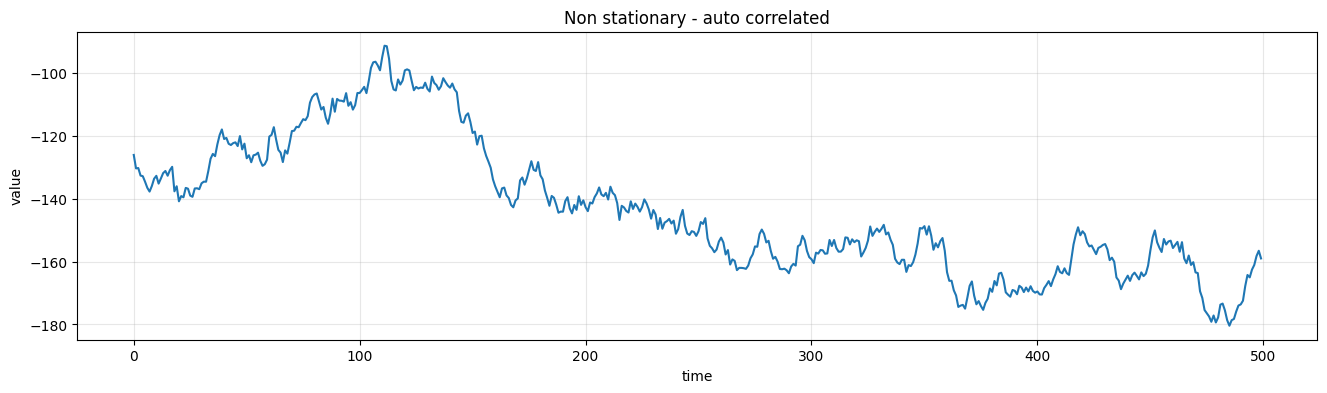

In [65]:
plot_sequence(time,lagged,title = "Non stationary - auto correlated")

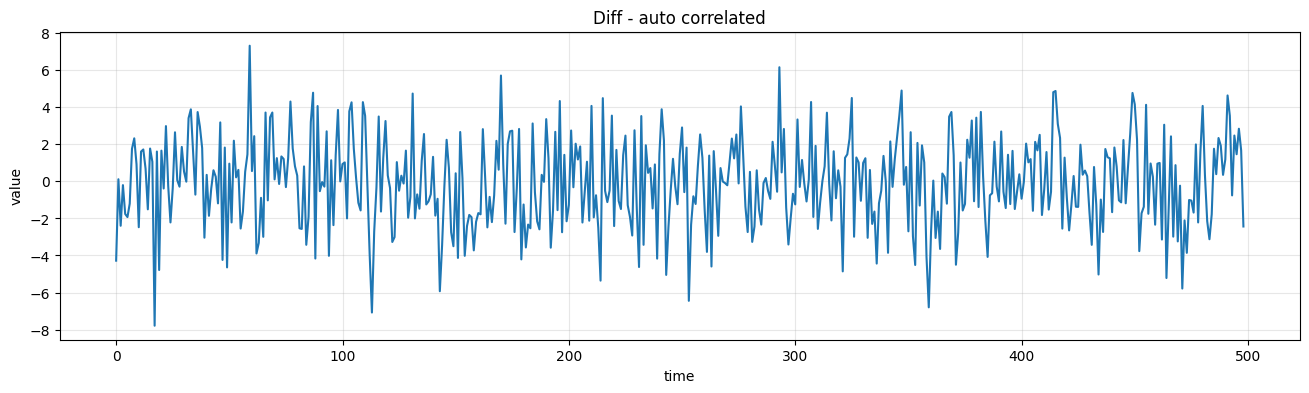

In [69]:
diff_lagged= np.diff(lagged)

plot_sequence(time[:-1],diff_lagged,title = "Diff - auto correlated")

In [ ]:
lagged
np.diff(lagged)

lagged[:-1] + lagged[1:]

499

## pandas autocorrelation_plot

- Time series 가 random 한 경우 autocorrelation 은 모든 time-lag 에서 zero 에 가까워야 함  

- Time series 가 non-random 한 경우 하나 이상의 autocorrelation 이 크게 non-zero 값을 보임  

- 플롯의 수평선은 95% 및 99% 신뢰 대역에 해당. 점선은 99% 신뢰 구간.

이 코드는 autocorrelation_plot() 함수를 사용하여 정상 상태의 시계열 데이터의 자기상관관계를 시각화합니다.  autocorrelation 이 모든 time-lag 에서 zero 에 가까우므로 정상 시계열로 판단합니다.

lagged 변수가 자기 상관성이 있는 시계열 데이터이기 때문에,  하나 이상의 autocorrelation 이 크게 non-zero 값을 보이고 있습니다.